In [9]:
import librosa
import librosa.display
import IPython.display as ipd0
from IPython.display import Audio
import os
import libfmp.c1
import scipy.io.wavfile as waves #biblioteca para procesar audio .wav en python
import matplotlib.pyplot as plt #biblioteca para graficar
import scipy as sp # for signal processing
from scipy import signal
import IPython.display as ipd
import numpy as np
import random
import makelab
from makelab import signal
from makelab import audio
%matplotlib inline

Libreria makelab diseñada y escrita por el profesor Jon E. Froehlich de la Univerdidad de Washington con ayuda de estudiantes con permiso de uso libre para fines educativos

In [10]:
# INGRESO
# archivo = input('archivo de audio: ')
'''
arch=input('ingrese el nombre del archivo: ')
archivo=(arch +'.wav')
'''
archivo = 'Alarm01.wav' #archivo de entrada

In [19]:
# PROCEDIMIENTO
fs, sonido = sp.io.wavfile.read(archivo) #biblioteca lee el archivo de audio y devuelve la frecuencia de muestreo y los bits de dos canales (monofonoico y estrereo)
dt = 1/fs #Periodo de muestreo
tamano_sonido = len(sonido)#devuelve la cantidad de simbolos v(k) del audio digitalizado
t = np.arange(0,tamano_sonido*dt,dt) #valor de intervalos de tiempo del audio
#trabajar con un solo canal de audio
tamano = np.shape(sonido) #divide ambos vectores de canales
#muestras = tamano[0]
m = len(tamano) #cantidad de canales de las muestras de audio
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    uncanal = sonido[:,canal] 
else:
    uncanal = sonido

longitud_del_audio_en_sec=uncanal.shape[0]/fs
bits = 16 #cantidad de bits para cuantizacion

122868


In [12]:
print(f"Sampling rate: {fs} Hz")
print(f"Number of channels = {len(sonido.shape)}")
print(f"Total samples: {sonido.shape[0]}")
print(f"Duracion del audio = {longitud_del_audio_en_sec}s")
print(f"{bits}-Los niveles de cuantizacion van de -{2**(bits - 1)} a {2**(bits - 1) - 1}")
print(f"Valor de amplitutud maximo de la senal de audio: {np.max(uncanal)} Avg value: {np.mean(uncanal):.2f}")

Sampling rate: 22050 Hz
Number of channels = 2
Total samples: 122868
Duracion del audio = 5.572244897959184s
16-Los niveles de cuantizacion van de -32768 a 32767
Valor de amplitutud maximo de la senal de audio: 9280 Avg value: -2.02


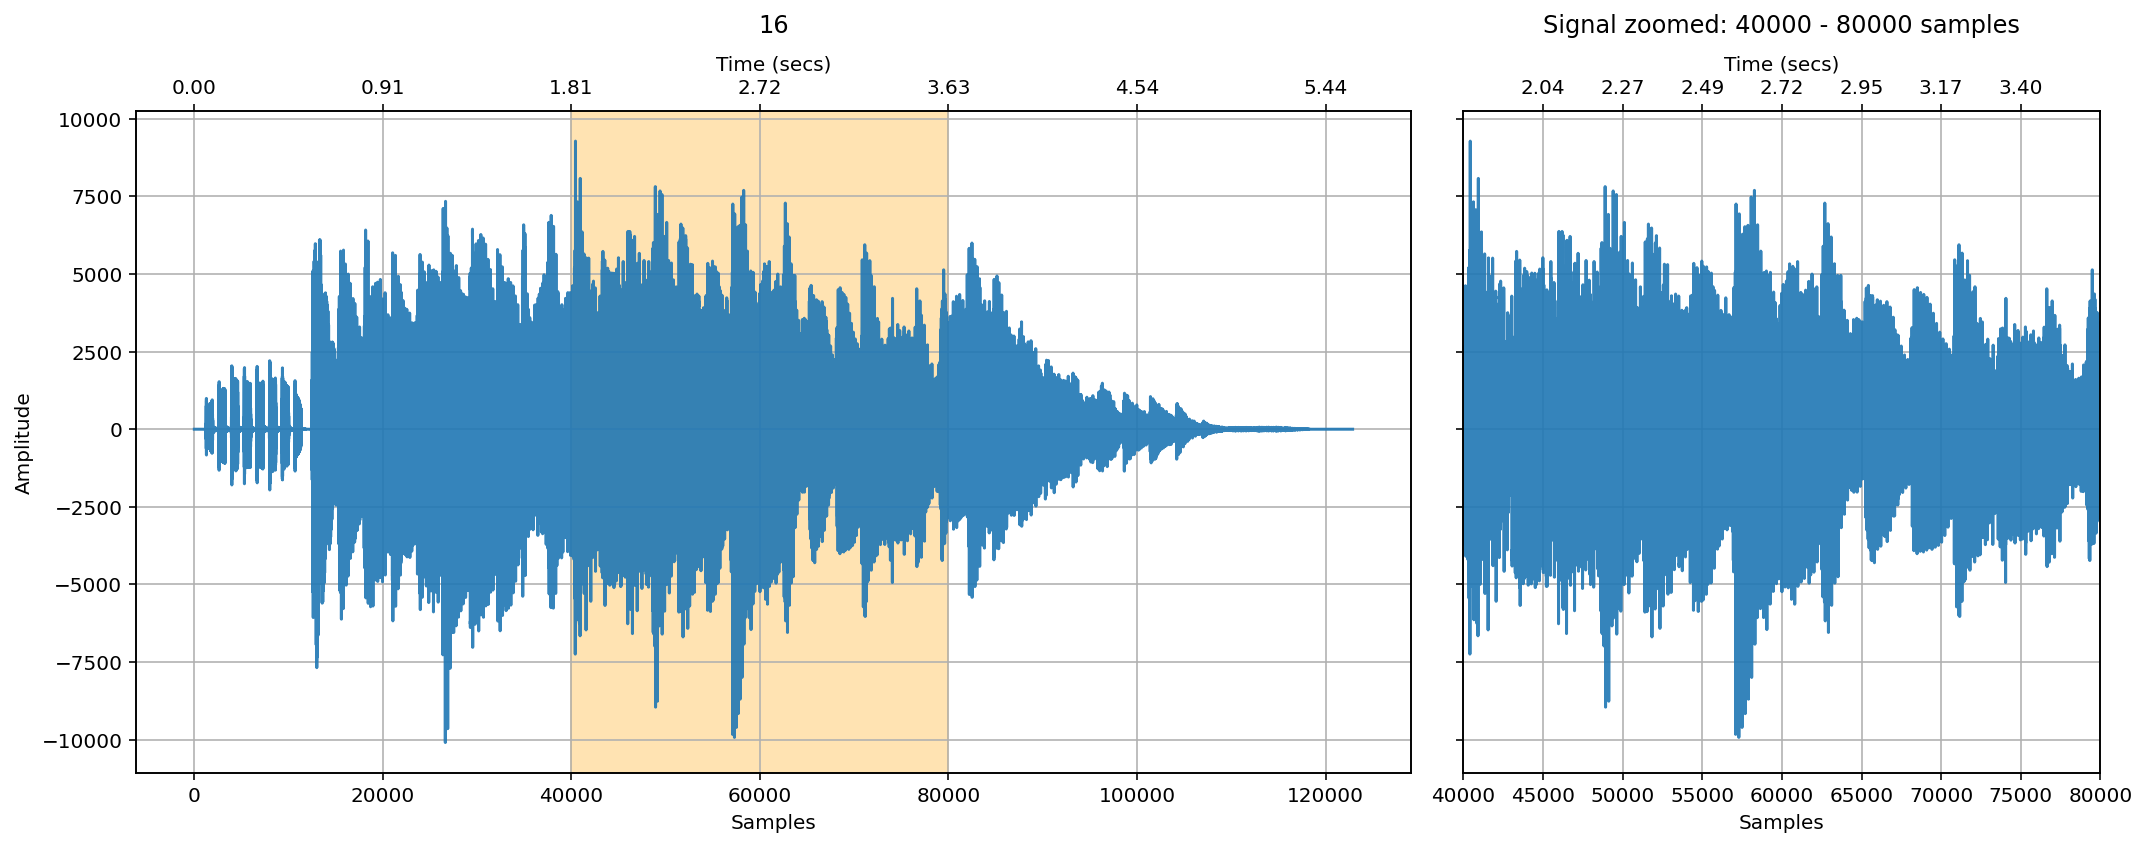

In [13]:
xlim_zoom = (40000, 80000) # you may want to change this depending on what audio file you have loaded
makelab.signal.plot_signal(uncanal, fs, bits, xlim_zoom = xlim_zoom)
ipd.Audio(uncanal, rate=fs)

In [14]:
def cambiar_cuantizacion(bits_cuantiazcion,bit_senal):
    audio_senal_con_valores_enteros = uncanal / 2**bit_senal # 16 bit audio
    btK = audio_senal_con_valores_enteros * 2**bits_cuantiazcion
    btK = btK.astype(int)
    print(btK)
    print(f"{bits_cuantiazcion}-bit audio ranges from -{2**(bits_cuantiazcion - 1)} to {2**(bits_cuantiazcion - 1) - 1}")
    print(f"Max value: {np.max(btK)} Avg value: {np.mean(btK):.2f}")

    
    return bits_cuantiazcion,bit_senal,btK

[0 0 0 ... 0 0 0]
4-bit audio ranges from -8 to 7
Max value: 2 Avg value: -0.00


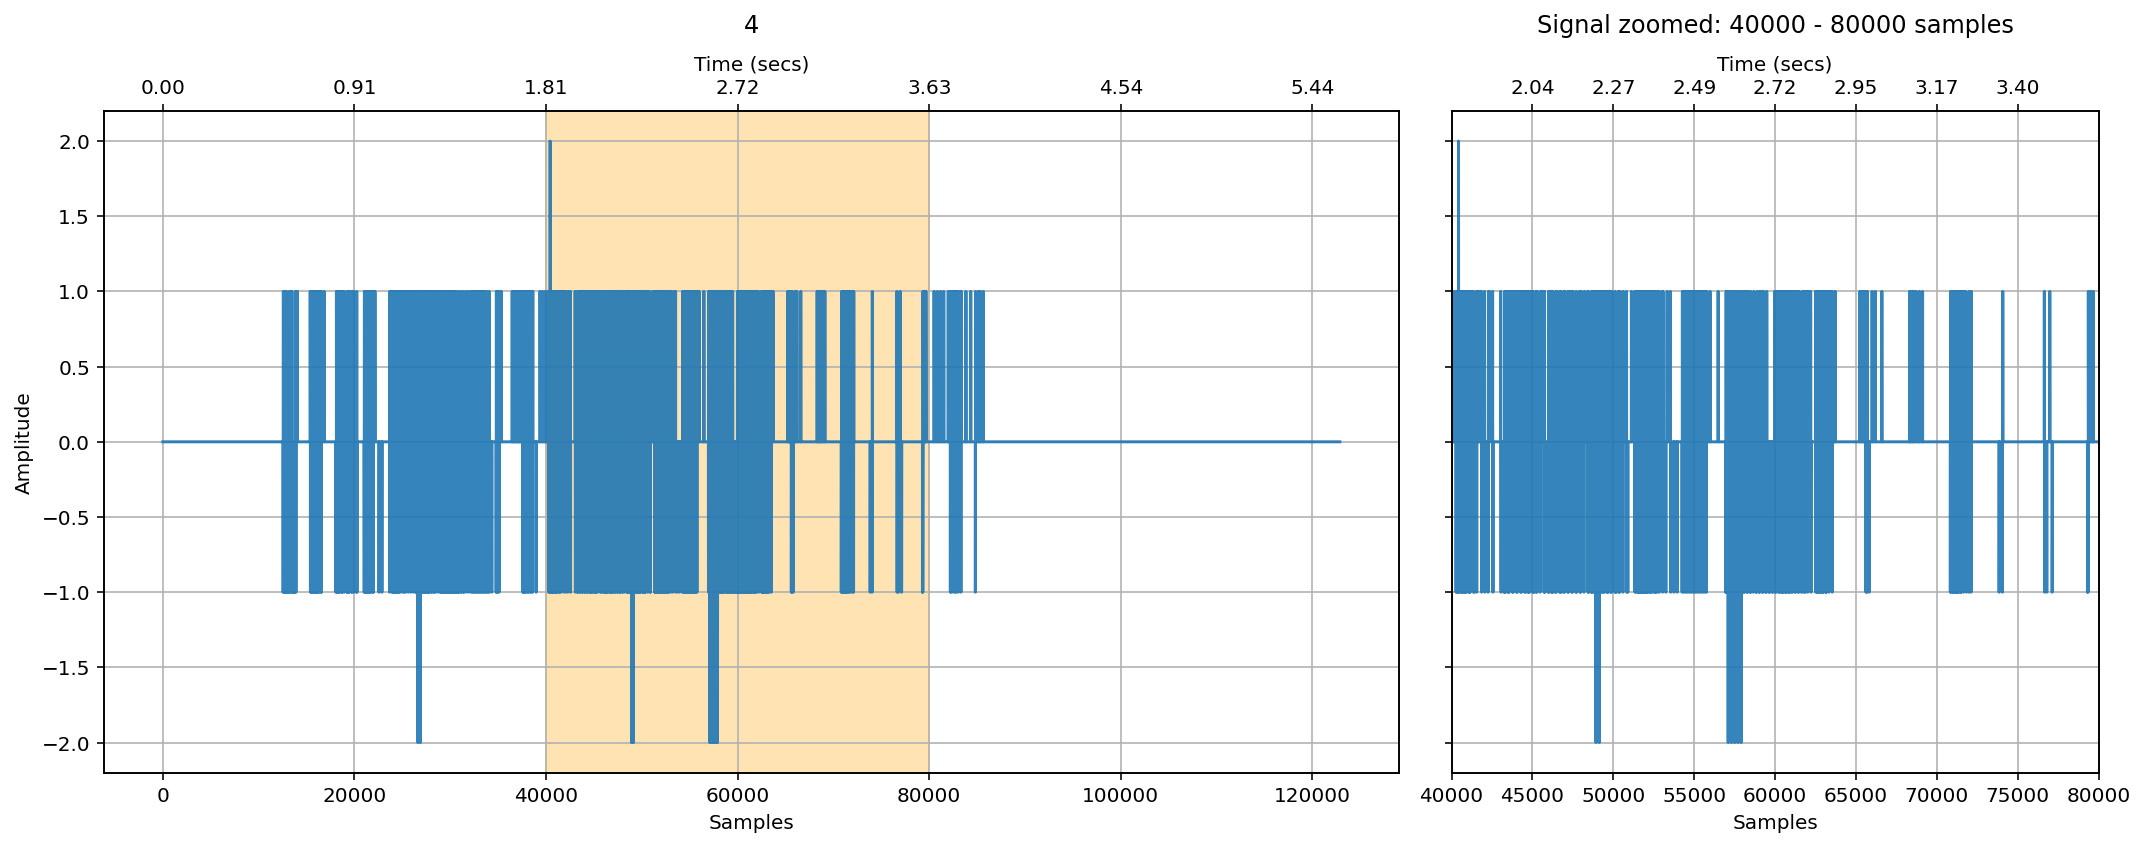

In [15]:
bits_cuantiazcion,bit_senal,btK=cambiar_cuantizacion(4,16)
makelab.signal.plot_signal(btK, fs, bits_cuantiazcion, xlim_zoom = xlim_zoom)
ipd.Audio(btK, rate=fs)

In [16]:
#escribir y guardar archivo .wav
parte = uncanal[:]
print('archivo de parte[] grabado...')
waves.write('resultado.wav', fs, parte)

archivo de parte[] grabado...
